In [38]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from yahoofinancials import YahooFinancials
import json
import hvplot.pandas


import numpy as np
import panel as pn
from panel.interact import interact


In [39]:
yahoo_financials = YahooFinancials('SPY')
SPY_prices=(yahoo_financials.get_historical_price_data("2020-06-01", "2022-06-01", "weekly"))

In [40]:
json_object= json.dumps(SPY_prices['SPY']['prices'], indent = 4)
with open("sample.json", "w") as outfile:
    outfile.write(json_object)

In [41]:
SPY_prices = pd.read_json('sample.json')

In [42]:
SPY_prices_df = pd.DataFrame(SPY_prices)

In [50]:
SPY_prices_df

,date,high,low,open,close,volume,adjclose,formatted_date
0,2020-06-01 04:00:00,321.269989,303.059998,303.619995,319.339996,448912200,308.883118,2020-06-01
1,2020-06-08 04:00:00,323.410004,298.600006,320.220001,304.209991,650043700,294.248505,2020-06-08
2,2020-06-15 04:00:00,315.640015,296.739990,298.019989,308.640015,573187400,298.533508,2020-06-15
3,2020-06-22 04:00:00,314.500000,299.420013,307.989990,300.049988,493363100,291.501953,2020-06-22
4,2020-06-29 04:00:00,315.700012,298.929993,301.410004,312.230011,334908800,303.334930,2020-06-29
...,...,...,...,...,...,...,...,...
100,2022-05-02 04:00:00,429.660004,405.019989,412.070007,411.339996,727288500,409.570770,2022-05-02
101,2022-05-09 04:00:00,406.410004,385.149994,405.100006,401.720001,659709500,399.992157,2022-05-09
102,2022-05-16 04:00:00,408.570007,380.540009,399.980011,389.630005,509269500,387.954163,2022-05-16
103,2022-05-23 04:00:00,415.380005,386.959991,392.829987,415.260010,426273600,413.473907,2022-05-23


In [51]:
SPY_close_df = SPY_prices_df.drop(['date','high','low','open','adjclose','volume'],axis=1)
SPY_volume_df = SPY_prices_df.drop(['date','high','low','open','adjclose','close'],axis=1)

In [52]:
SPY_close_df

,close,formatted_date
0,319.339996,2020-06-01
1,304.209991,2020-06-08
2,308.640015,2020-06-15
3,300.049988,2020-06-22
4,312.230011,2020-06-29
...,...,...
100,411.339996,2022-05-02
101,401.720001,2022-05-09
102,389.630005,2022-05-16
103,415.260010,2022-05-23


In [53]:
SPY_close_df = SPY_close_df.set_index('formatted_date')
                                      #, drop=True, append=False, inplace=True, verify_integrity=False)

In [54]:
SPY_close_df

,close
formatted_date,
2020-06-01,319.339996
2020-06-08,304.209991
2020-06-15,308.640015
2020-06-22,300.049988
2020-06-29,312.230011
...,...
2022-05-02,411.339996
2022-05-09,401.720001
2022-05-16,389.630005


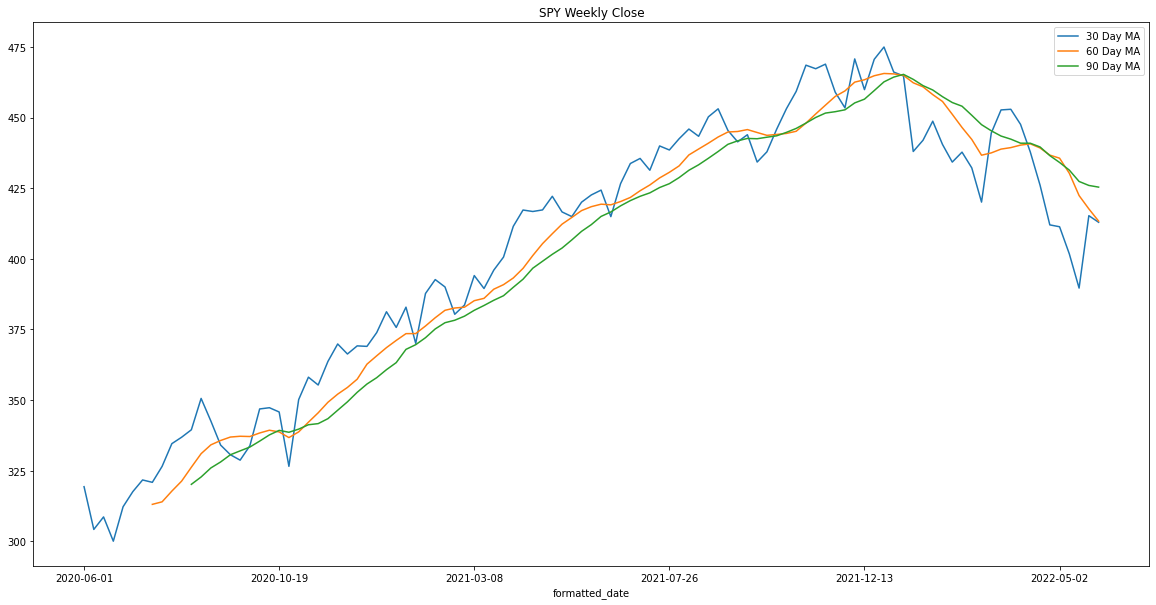

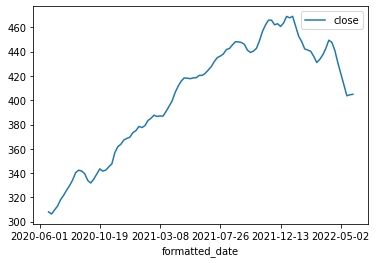

In [55]:
ax = SPY_close_df.plot(title='SPY Weekly Close',figsize=(20,10))
SPY_close_df.rolling(window=4).mean().plot()
SPY_close_df.rolling(window=8).mean().plot(ax=ax)
SPY_close_df.rolling(window=12).mean().plot(ax=ax)

# Set the legend of the figure
ax.legend(["30 Day MA", "60 Day MA", "90 Day MA"]);

In [57]:
yahoo_financials = YahooFinancials('GC=F')
gold_prices=(yahoo_financials.get_historical_price_data("2020-06-01", "2022-06-01", "weekly"))